<h1 style="color:skyblue;">Health Risk Category Classification (Classification Task) </h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("ML101_train_dataset.csv")

<h2 style="color:orange;"> Imported ColumnTransformer for performing Imputation on Columns</h2>

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [4]:
trf1=ColumnTransformer([
    ('impute_missing',SimpleImputer(strategy='mean'),[0,1,2,3,5,6,7,8,9,10]),
    ('impute_missing1',SimpleImputer(strategy='most_frequent'),[4,11])
],remainder='passthrough')

In [5]:
new=trf1.fit_transform(df)

<h2 style="color:orange;">After fitting the data performed OneHotEncoding on 'Gender' column</h2>

In [6]:
new=pd.DataFrame(new,columns=['Average Daily Steps','Hours of Sleep','Caloric Intake','Age','Height','Weight','Cholesterol level','Blood Sugar level','Systolic BP','Diastolic BP','Gender','LifeStyle'])

In [7]:
new2=pd.get_dummies(new,columns=['Gender'])

In [8]:
new2

,Average Daily Steps,Hours of Sleep,Caloric Intake,Age,Height,Weight,Cholesterol level,Blood Sugar level,Systolic BP,Diastolic BP,LifeStyle,Gender_Female,Gender_Male
0,15725.0,6.518042,1714.0,56.0,178.416872,75.489346,185.40855,104.442836,172.813045,75.552416,Average,0,1
1,6733.0,9.1763,2508.0,69.0,176.826592,54.635484,191.698148,104.851888,198.729261,-103.634282,Average,1,0
2,7424.0,4.856772,1366.0,46.0,182.281966,63.578372,212.625051,106.649132,172.905053,87.816911,Bad,0,1
3,11853.0,9.727244,2189.0,32.0,168.520316,59.397202,205.440351,121.982302,204.527361,99.791603,Bad,1,0
4,7521.0,6.433183,2342.0,48.526844,145.273232,62.57474,161.368583,126.408787,187.882666,88.240932,Average,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2265.0,7.005729,2030.0,53.0,182.202253,65.03535,212.13338,115.360556,348.653753,88.464038,Bad,0,1
99996,10959.0,9.661165,2233.0,22.0,185.802297,63.457075,227.699267,112.321197,205.758576,97.740461,Good,0,1
99997,10497.616889,7.378317,2080.0,37.0,168.520316,41.227254,224.300704,121.369845,195.905161,-107.061245,Good,0,1
99998,12110.0,9.843323,1434.0,72.0,155.025779,106.908491,140.865132,94.524506,149.675364,200.964967,Great,1,0


<h2 style="color:orange;">As the Data Contained too much Outliers, tried filling most with median</h2>

In [9]:
def outliers_updated(new_df):

    for i in new_df.columns:
        data  = new_df[i].tolist()
        sorted_data = sorted(data)

        Q1 = np.percentile(data,25)
        Q3 = np.percentile(data,75)
        IQR = Q3 -Q1

        median = sorted_data[len(data)//2]
        updated = [median if j< Q1 - 1.5*IQR or j>Q3 + 1.5*IQR else j for j in data]

        new_df[i] = updated
X_train=new2.drop(columns=['LifeStyle'])
Y_train=new2.iloc[:,-3]
outliers_updated(X_train)

In [10]:
X_train

,Average Daily Steps,Hours of Sleep,Caloric Intake,Age,Height,Weight,Cholesterol level,Blood Sugar level,Systolic BP,Diastolic BP,Gender_Female,Gender_Male
0,15725.000000,6.518042,1714.0,56.000000,178.416872,75.489346,185.408550,104.442836,172.813045,75.552416,0,1
1,6733.000000,9.176300,2508.0,69.000000,176.826592,54.635484,191.698148,104.851888,198.729261,91.102447,1,0
2,7424.000000,4.856772,1366.0,46.000000,182.281966,63.578372,212.625051,106.649132,172.905053,87.816911,0,1
3,11853.000000,9.727244,2189.0,32.000000,168.520316,59.397202,205.440351,121.982302,204.527361,99.791603,1,0
4,7521.000000,6.433183,2342.0,48.526844,145.273232,62.574740,161.368583,126.408787,187.882666,88.240932,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2265.000000,7.005729,2030.0,53.000000,182.202253,65.035350,212.133380,115.360556,200.394654,88.464038,0,1
99996,10959.000000,9.661165,2233.0,22.000000,185.802297,63.457075,227.699267,112.321197,205.758576,97.740461,0,1
99997,10497.616889,7.378317,2080.0,37.000000,168.520316,41.227254,224.300704,121.369845,195.905161,91.102447,0,1
99998,12110.000000,9.843323,1434.0,72.000000,155.025779,70.025165,140.865132,94.524506,149.675364,91.102447,1,0


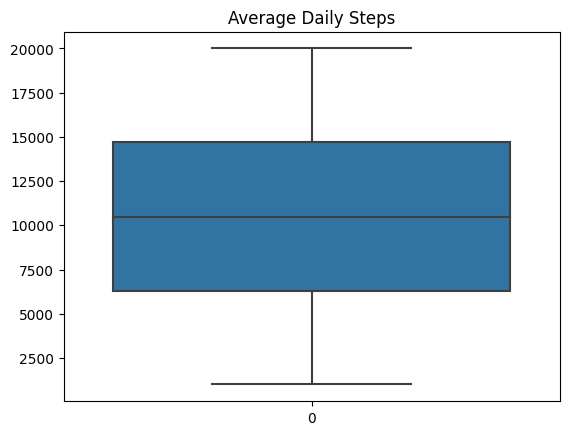

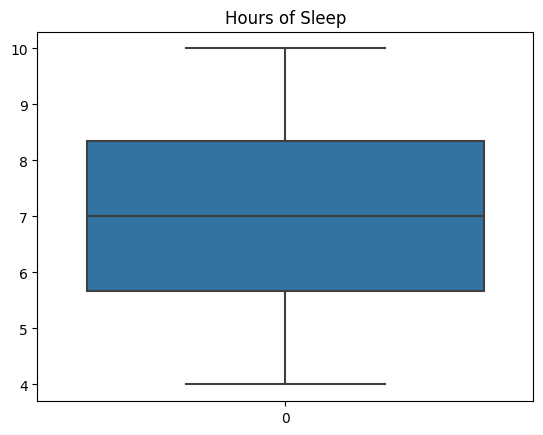

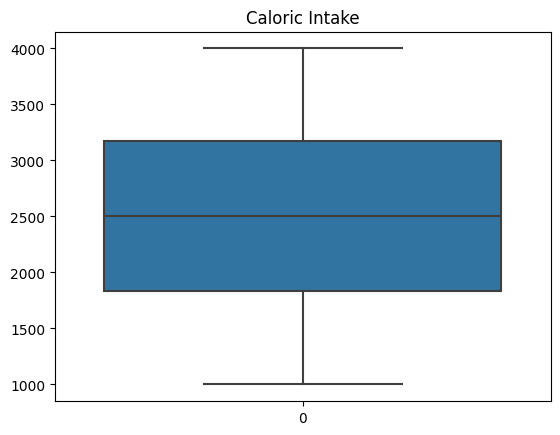

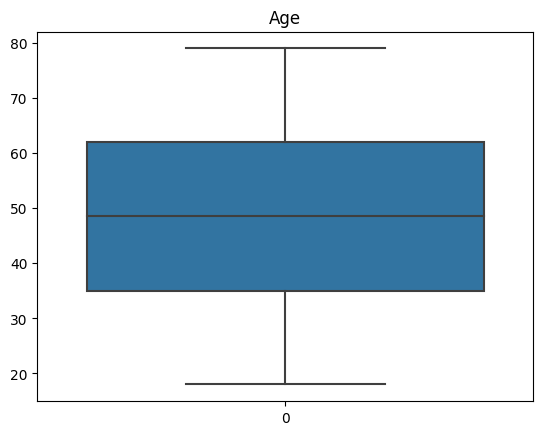

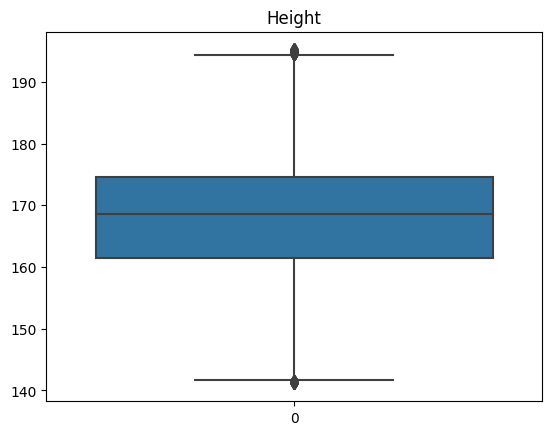

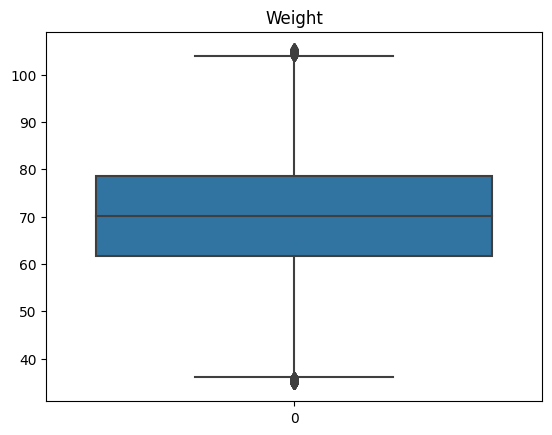

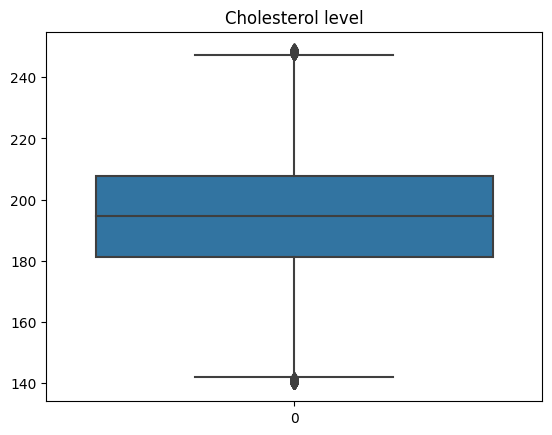

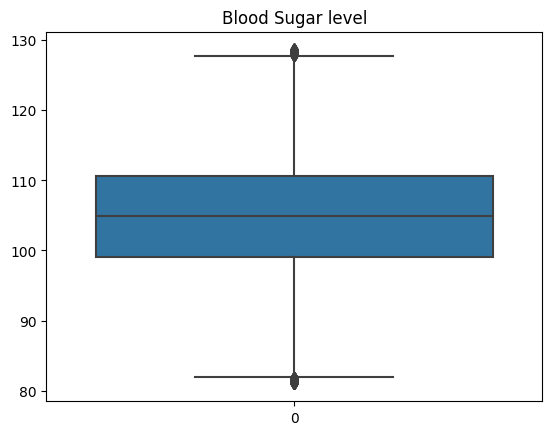

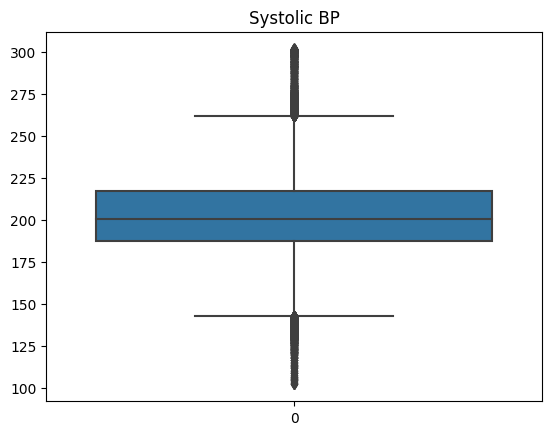

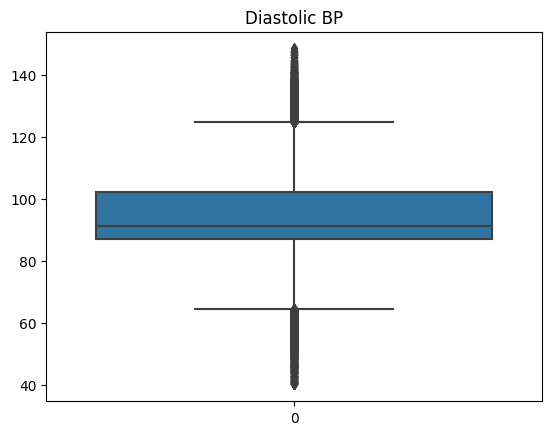

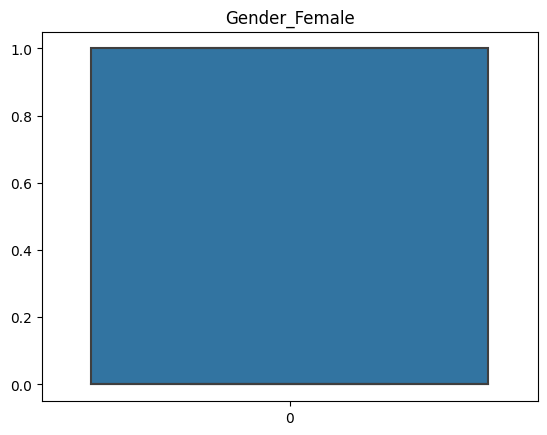

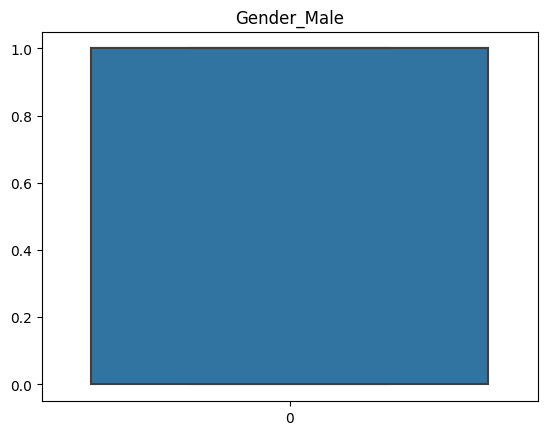

In [11]:
for i in X_train:
    sns.boxplot(X_train[i])
    plt.title(i)
    plt.show()

<h2 style="color:orange;">For basic testing did Test_Train_Split and checked for various Classification Algorithms </h2>

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train.drop(columns=['Systolic BP','Diastolic BP']),Y_train,test_size=0.3,shuffle=True)

### KNN for Classification

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier(n_neighbors=11)
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [14]:
Y_pred=knn1.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_pred)

0.6587

### Tried Naive Bayes and Got A Better Result

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
ypred1=gnb.predict(x_test)
accuracy_score(y_test,ypred1)

0.7107666666666667

<h2 style="color:orange;">Now Doing the Final Training on Whole Training Data and Predicting for Test Data</h2>

In [17]:
test=pd.read_csv('ML101_dataset_test_feature.csv')
test=pd.get_dummies(test,columns=['Gender'])

In [18]:
gnb1=GaussianNB()
gnb1.fit(X_train.drop(columns=['Systolic BP','Diastolic BP']),Y_train)


GaussianNB()

In [19]:
Y_pred=gnb1.predict(test)

In [ ]:
id=np.arange(0,test.shape[0])
data = {'ID': id, 'LifeStyle': Y_pred}
df = pd.DataFrame(data)
csv_file_path = 'BitbyBit.csv'

# Write the DataFrame to a CSV file
df.to_csv('BitbyBitClassification.csv',index=False)